In [162]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import os
import shutil
import pywt
%matplotlib inline

In [163]:
img = cv2.imread('./images_dataset/maria_sharapova/d90560477a89f8e9670a3a5e092ba8dd.jpg')
img.shape

(1099, 736, 3)

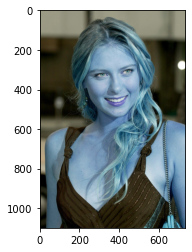

In [164]:
plt.imshow(img)

In [165]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1099, 736)

In [166]:
gray

array([[148, 148, 148, ..., 150, 151, 150],
       [147, 148, 148, ..., 151, 150, 149],
       [147, 148, 148, ..., 150, 150, 148],
       ...,
       [  1,   1,   1, ..., 119, 124, 128],
       [  1,   1,   1, ..., 120, 125, 131],
       [  1,   1,   1, ..., 119, 125, 132]], dtype=uint8)

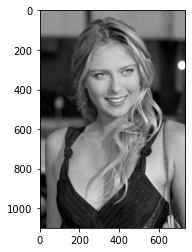

In [167]:
plt.imshow(gray, cmap='gray')

In [168]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

faces

array([[210, 190, 334, 334]], dtype=int32)

In [169]:
(x,y,w,h) = faces[0]
x,y,w,h

(210, 190, 334, 334)

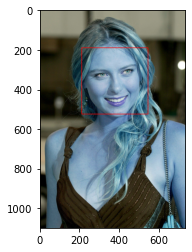

In [170]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

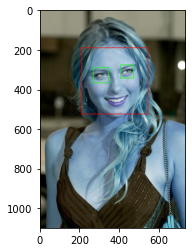

In [171]:
cv2.destroyAllWindows()

for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey), (ex+ew, ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

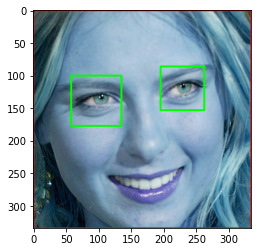

In [172]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [173]:
def cropped_img(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for(x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y), (x+w, y+h), (255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = face_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

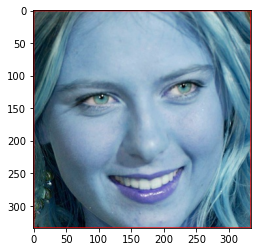

In [174]:
cropped_img1 = cropped_img('./images_dataset/maria_sharapova/d90560477a89f8e9670a3a5e092ba8dd.jpg')
plt.imshow(cropped_img1)

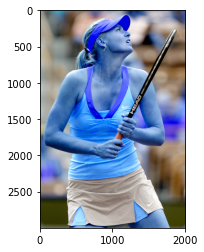

In [175]:
# model/images_dataset/maria_sharapova/3-681.jpg

org_image_obstructed = cv2.imread('./images_dataset/maria_sharapova/3-681.jpg')
plt.imshow(org_image_obstructed)

In [176]:
cImg2 = cropped_img('./images_dataset/maria_sharapova/3-681.jpg')
cImg2

In [177]:
dsPath = './images_dataset/'
crDsPath = './cropped/'

img_dirs = []
for entry in os.scandir(dsPath):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [178]:
img_dirs

['./images_dataset/maria_sharapova',
 './images_dataset/virat_kohli',
 './images_dataset/lionel_messi',
 './images_dataset/serena_williams',
 './images_dataset/roger_federer']

In [179]:
# if the folder exists remove
if os.path.exists(crDsPath):
    shutil.rmtree(crDsPath)

# creates folder
os.mkdir(crDsPath)

In [180]:
# array for cropped image directory
crImgDir = []

# dict for name of celb and number of file paths
celebFnDict = {}

# takes celeb names from directory adds to var cName
for img_dir in img_dirs:
    count = 1
    cName =img_dir.split('/')[-1]
    print(cName)
    celebFnDict[cName] = []

    # iterates through using cropped_img function if it returns create a folder
    for entry in os.scandir(img_dir):
        roi_color = cropped_img(entry.path)
        if roi_color is not None:
            cFolder = crDsPath + cName
            if not os.path.exists(cFolder):
                os.makedirs(cFolder)
                crImgDir.append(cFolder)
                print("Making cropped images in folder: ", cFolder)
            crFn = cName + str(count) + ".png"
            crFp = cFolder + "/" + crFn

            cv2.imwrite(crFp, roi_color)
            celebFnDict[cName].append(crFp)
            count += 1
print("All tasks completed!")

maria_sharapova
Making cropped images in folder:  ./cropped/maria_sharapova
virat_kohli
Making cropped images in folder:  ./cropped/virat_kohli
lionel_messi
Making cropped images in folder:  ./cropped/lionel_messi
serena_williams
Making cropped images in folder:  ./cropped/serena_williams
roger_federer
Making cropped images in folder:  ./cropped/roger_federer
All tasks completed!


In [182]:
crImgDir

['./cropped/maria_sharapova',
 './cropped/virat_kohli',
 './cropped/lionel_messi',
 './cropped/serena_williams',
 './cropped/roger_federer']

In [183]:
celebFnDict = {}
for img_dir in crImgDir:
    cName = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebFnDict[cName] = file_list
celebFnDict

{'maria_sharapova': ['./cropped/maria_sharapova/maria_sharapova2.png',
  './cropped/maria_sharapova/maria_sharapova3.png',
  './cropped/maria_sharapova/maria_sharapova1.png',
  './cropped/maria_sharapova/maria_sharapova4.png',
  './cropped/maria_sharapova/.DS_Store',
  './cropped/maria_sharapova/maria_sharapova5.png',
  './cropped/maria_sharapova/maria_sharapova7.png',
  './cropped/maria_sharapova/maria_sharapova6.png',
  './cropped/maria_sharapova/maria_sharapova17.png',
  './cropped/maria_sharapova/maria_sharapova16.png',
  './cropped/maria_sharapova/maria_sharapova28.png',
  './cropped/maria_sharapova/maria_sharapova14.png',
  './cropped/maria_sharapova/maria_sharapova15.png',
  './cropped/maria_sharapova/maria_sharapova29.png',
  './cropped/maria_sharapova/maria_sharapova11.png',
  './cropped/maria_sharapova/maria_sharapova10.png',
  './cropped/maria_sharapova/maria_sharapova12.png',
  './cropped/maria_sharapova/maria_sharapova13.png',
  './cropped/maria_sharapova/maria_sharapova22

In [105]:
def w2d(img, mode='haar', level='1'):
    imArray = img

    # data type conversion
    # convert to grayscale

    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)

    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255

    coeffs = pywt.wavedec2(imArray, mode, level=level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

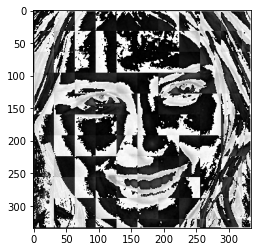

In [106]:
im_har = w2d(cropped_img1, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [110]:
class_dict = {}

count = 0

for celebrity_name in celebFnDict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [112]:
x = []
y = []

for celebrity_name, training_files in celebFnDict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [116]:
x = np.array(x).reshape(len(x), 4096).astype(float)